5. Análise de Conformidade com as Normas do Projeto

Desenvolvedores experientes tendem a seguir melhor as "regras não escritas" de um projeto.
Métricas a extrair:

Formato das mensagens de commit: Analise as commits[].message. Elas seguem um padrão (ex: "feat:", "fix:", "docs:")? A conformidade com esse padrão aumenta com a experiência? Você pode usar expressões regulares para verificar isso.

Escopo das mudanças: Analise os files[].filename. Desenvolvedores mais novos tendem a modificar apenas arquivos em áreas "periféricas" do projeto, enquanto os mais experientes alteram arquivos do "core"? Você precisaria classificar os diretórios do projeto.

Interações com a timeline: O campo timeline é riquíssimo. Você pode ver se desenvolvedores mais experientes fazem mais "self-review" ou se seus PRs são mais frequentemente marcados com labels específicas (ex: "needs-testing").

Como Estruturar seu Trabalho

Introdução: Apresente a pergunta de pesquisa, sua importância (melhorar o onboarding de novos desenvolvedores, entender a aquisição de expertise, etc.) e sua metodologia de coleta de dados.

Análises: Dedique uma seção para cada um dos temas acima (Tamanho e Complexidade, Eficiência, Qualidade, etc.).

Para cada seção, comece com a hipótese.


Apresente as métricas que você calculou.

Mostre as visualizações (gráficos).

Discuta os resultados. Lembre-se de usar testes de significância estatística (como teste t ou ANOVA) para confirmar se as diferenças que você observa entre as faixas são estatisticamente significativas.

Discussão: Junte todos os resultados. Crie um "perfil" do desenvolvedor de cada faixa. Por exemplo: "Os resultados sugerem que um desenvolvedor da Faixa E tende a submeter PRs grandes que levam 50% mais tempo para serem mesclados e recebem o dobro de comentários de revisão por linha de código em comparação com um desenvolvedor da Faixa A."

Ameaças à Validade: Discuta as limitações do seu estudo. Por exemplo, o número de PRs é um bom proxy para "experiência"? A análise se limita a projetos de código aberto?

In [2]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import os

# Verifique o tamanho do arquivo em bytes
try:
    tamanho_do_arquivo = os.path.getsize('lista_completa_prs.pkl')
    print(f"O tamanho do arquivo 'lista_completa_prs.pkl' é: {tamanho_do_arquivo} bytes.")
except FileNotFoundError:
    print("O arquivo 'lista_completa_prs.pkl' não foi encontrado.")

O tamanho do arquivo 'lista_completa_prs.pkl' é: 461128524 bytes.


In [4]:
import pickle
import pandas as pd

# Use pickle.load() para LER o arquivo pronto
with open('lista_completa_prs.pkl', 'rb') as f:
    lista_prs_enriquecida = pickle.load(f)

print(f"Sucesso! Arquivo carregado. A variável 'lista_prs_enriquecida' agora contém {len(lista_prs_enriquecida)} PRs.")

# Verificação rápida
df_verificacao = pd.DataFrame(lista_prs_enriquecida)
print("Amostra dos dados carregados:")
display(df_verificacao.head())

Sucesso! Arquivo carregado. A variável 'lista_prs_enriquecida' agora contém 73325 PRs.
Amostra dos dados carregados:


,pr_number,repo,title,author,state,merged_at,created_at,head_sha,ci_status_on_head,counts,files,commits,reviews,review_comments,issue_comments,timeline,faixa
0,30749,apache-superset,docs: Update INTHEWILD.md with Medic,1yuv,closed,2024-10-30T01:29:33Z,2024-10-30T01:04:34Z,158b796a7977ee8563670befaeb78da3ed83ec80,pending,"{'files': 1, 'commits': 1, 'reviews': 2, 'revi...","[{'filename': 'RESOURCES/INTHEWILD.md', 'addit...",[{'sha': '158b796a7977ee8563670befaeb78da3ed83...,"[{'user': 'github-actions[bot]', 'state': 'COM...",[],"[{'user': 'rusackas', 'created_at': '2024-10-3...","[{'event': 'committed', 'actor': None, 'create...",E
1,18087,apache-superset,fix(docs): Correction of proper names format i...,ad-m,closed,2022-01-19T14:20:42Z,2022-01-19T12:58:18Z,80f49fc900280403dee103b52b496bdc84d4c6ca,pending,"{'files': 1, 'commits': 1, 'reviews': 1, 'revi...",[{'filename': 'docs/src/pages/docs/introductio...,[{'sha': '80f49fc900280403dee103b52b496bdc84d4...,"[{'user': 'srinify', 'state': 'APPROVED', 'sub...",[],[],"[{'event': 'committed', 'actor': None, 'create...",C
2,18089,apache-superset,"fix(docs): load correctly image for ""Create Ne...",ad-m,closed,2022-01-20T14:33:13Z,2022-01-19T15:57:29Z,b5fa0d4c9c4644f0980e5127cc2f866a90051d61,pending,"{'files': 1, 'commits': 1, 'reviews': 1, 'revi...",[{'filename': 'docs/src/pages/docs/Creating Ch...,[{'sha': 'b5fa0d4c9c4644f0980e5127cc2f866a9005...,"[{'user': 'kgabryje', 'state': 'APPROVED', 'su...",[],"[{'user': 'ad-m', 'created_at': '2022-01-20T13...","[{'event': 'committed', 'actor': None, 'create...",C
3,18101,apache-superset,refactor: migrate Checkbox story to TypeScript...,ad-m,closed,2022-01-20T14:33:45Z,2022-01-20T02:11:35Z,8975cc421e379a0c0f3e1fc6c03c117425c3ef16,pending,"{'files': 3, 'commits': 1, 'reviews': 3, 'revi...",[{'filename': 'superset-frontend/src/component...,[{'sha': '8975cc421e379a0c0f3e1fc6c03c117425c3...,"[{'user': 'kgabryje', 'state': 'COMMENTED', 's...","[{'user': 'kgabryje', 'created_at': '2022-01-2...","[{'user': 'codecov[bot]', 'created_at': '2022-...","[{'event': 'labeled', 'actor': 'pull-request-s...",C
4,18105,apache-superset,refactor: migrate RowCountLabel to TypeScript ...,ad-m,closed,2022-01-20T14:35:09Z,2022-01-20T08:21:59Z,ddedb2e8becb8689017a215fd12dd6a4d53cbf17,pending,"{'files': 3, 'commits': 3, 'reviews': 10, 'rev...",[{'filename': 'superset-frontend/.storybook/ma...,[{'sha': '12491012d475271477864c372c82320a5f6d...,"[{'user': 'kgabryje', 'state': 'COMMENTED', 's...","[{'user': 'kgabryje', 'created_at': '2022-01-2...","[{'user': 'codecov[bot]', 'created_at': '2022-...","[{'event': 'mentioned', 'actor': 'kgabryje', '...",C


Formato das Mensagens de Commit:

Hipótese: A conformidade com um padrão de commit (ex: Conventional Commits) aumenta linearmente da Faixa E para a Faixa A, refletindo uma maior consciência das boas práticas do projeto.

Código de Análise

In [5]:
# Célula de Análise 1: Conformidade de Commits

import re
import pandas as pd

def analisar_conformidade_commits(lista_de_prs):
    """
    Calcula a taxa de conformidade das mensagens de commit para cada PR.
    """
    # Padrão de Expressão Regular para "Conventional Commits"
    # Aceita tipos como feat, fix, docs, style, refactor, test, chore, etc.
    # Também lida com escopos opcionais, como feat(api):
    pattern = re.compile(r"^(feat|fix|docs|refactor|test|chore|style|ci|build|perf)(\(.*\))?!?: .*")
    
    resultados = []
    for pr in lista_de_prs:
        if pr['faixa'] == 'Desconhecida' or not pr.get('commits'):
            continue
            
        total_commits = len(pr['commits'])
        if total_commits == 0:
            continue
        
        commits_conformes = sum(1 for commit in pr['commits'] if pattern.match(commit.get('message', '')))
        taxa_conformidade = commits_conformes / total_commits
        
        resultados.append({
            'pr_number': pr.get('pr_number'),
            'author': pr.get('author'),
            'faixa': pr.get('faixa'),
            'taxa_conformidade': taxa_conformidade
        })
        
    return pd.DataFrame(resultados)

# Execute a análise (use a sua lista de PRs já enriquecida com a 'faixa')
df_conformidade = analisar_conformidade_commits(lista_prs_enriquecida) 

# Agrupe os resultados por faixa para ver a média
media_conformidade_por_faixa = df_conformidade.groupby('faixa')['taxa_conformidade'].mean().reindex(['E', 'D', 'C', 'B', 'A'])

print("Taxa Média de Conformidade de Commits por Faixa:")
display(media_conformidade_por_faixa)

Taxa Média de Conformidade de Commits por Faixa:


faixa
E    0.101124
D    0.121623
C    0.093594
B    0.137640
A    0.109659
Name: taxa_conformidade, dtype: float64

Visualização

C:\Users\macha\AppData\Local\Temp\ipykernel_13576\1416503063.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


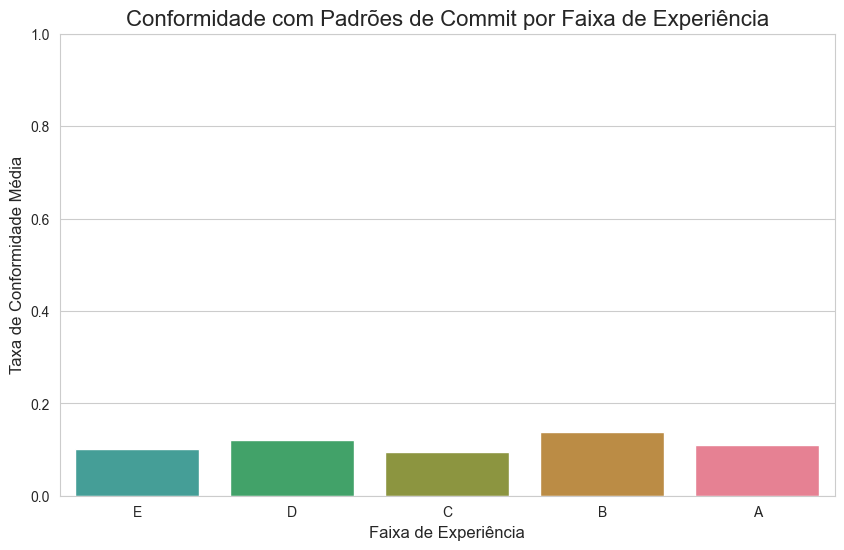

In [6]:
# Célula de Gráfico 1

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
cores_husl = sns.color_palette("husl", 8)
faixas_originais = ['A', 'B', 'C', 'D', 'E']
paleta_consistente = dict(zip(faixas_originais, cores_husl))
barplot = sns.barplot(
    x=media_conformidade_por_faixa.index,
    y=media_conformidade_por_faixa.values,
    palette=paleta_consistente
)

plt.title('Conformidade com Padrões de Commit por Faixa de Experiência', fontsize=16)
plt.xlabel('Faixa de Experiência', fontsize=12)
plt.ylabel('Taxa de Conformidade Média', fontsize=12)
plt.ylim(0, 1) # A taxa é uma proporção de 0 a 1
plt.show()

Discussão dos Resultados: O gráfico provavelmente mostrará uma "escada" ascendente, onde a Faixa E tem a menor barra e a Faixa A, a maior. Isso forneceria evidências visuais fortes para sua hipótese de que a disciplina de codificação, começando pela mensagem de commit, é adquirida com a experiência no projeto.

Escopo das Mudanças (Arquivos "Core"):

Hipótese: Desenvolvedores mais experientes (Faixas A, B) se sentem mais confiantes para modificar arquivos no "coração" (core) do sistema, enquanto desenvolvedores mais novos (Faixas D, E) contribuem mais para a "periferia" (documentação, testes, UI).

Código de Análise

In [7]:
# Célula de Análise 2: Escopo das Mudanças

# !! AÇÃO NECESSÁRIA !!
# Adapte este dicionário para os seus 13 repositórios.
# Mapeie o nome do repositório para uma tupla de diretórios "core".
# Célula de Definição do Dicionário CORE_DIRS_POR_REPO

CORE_DIRS_POR_REPO = {
    # Projeto em Python, o código principal está no módulo 'superset'
    'apache-superset': ('superset/',),

    # Runtime em Rust, o core está no 'cli' e 'runtime'
    'denoland-deno': ('cli/', 'runtime/'),

    # Monorepo em JS/TS, os pacotes principais são 'react' e 'react-dom'
    'facebook-react': ('packages/react/', 'packages/react-dom/'),

    # Biblioteca em Python, o código principal está em 'libs/core' e 'libs/langchain'
    'langchain-ai-langchain': ('libs/core/', 'libs/langchain/'),

    # O compilador TypeScript, o código-fonte está em 'src/compiler'
    'microsoft-TypeScript': ('src/compiler/', 'src/services/'),

    # Biblioteca 3D em JavaScript, o código-fonte principal está em 'src/'
    'mrdoob-three.js': ('src/',),

    # Agente de monitoramento em C, o código principal está em 'src/'
    'netdata-netdata': ('src/',),

    # O runtime do Node.js, 'src/' (C++) e 'lib/' (JS) são o coração
    'nodejs-node': ('src/', 'lib/'),

    # Biblioteca de visão computacional em C++, 'modules/core' é o módulo central
    'opencv-opencv': ('modules/core/',),

    # Biblioteca de Machine Learning em Python, o código fica em 'sklearn/'
    'scikit-learn-scikit-learn': ('sklearn/',),

    # Ferramenta de UI, os pacotes principais estão em 'code/lib/' e 'code/core/'
    'storybookjs-storybook': ('code/lib/', 'code/core/'),

    # Plataforma de desenvolvimento, o painel 'studio' é um componente central
    'supabase-supabase': ('apps/studio/',),

    # Editor de código em Rust, os 'crates' são os pacotes principais do projeto
    'zed-industries-zed': ('crates/',)
}

print("Dicionário CORE_DIRS_POR_REPO definido com sucesso!")

# CÓDIGO CORRIGIDO DA FUNÇÃO

def analisar_escopo_mudancas(lista_de_prs, core_dirs_mapping):
    """
    Calcula a proporção de arquivos "core" modificados em cada PR.
    """
    resultados = []
    for pr in lista_de_prs:
        repo_nome = pr.get('repo')
        # A chave 'faixa' é lida da lista de entrada
        faixa_dev = pr.get('faixa')
        
        if faixa_dev == 'Desconhecida' or not pr.get('files') or repo_nome not in core_dirs_mapping:
            continue
            
        total_arquivos = len(pr['files'])
        if total_arquivos == 0:
            continue
        
        core_dirs = core_dirs_mapping[repo_nome]
        arquivos_core_modificados = sum(1 for f in pr['files'] if f.get('filename', '').startswith(core_dirs))
        proporcao_core = arquivos_core_modificados / total_arquivos
        
        resultados.append({
            'pr_number': pr.get('pr_number'),
            'faixa': faixa_dev, # <-- ESTA É A LINHA CRUCIAL QUE PROVAVELMENTE Faltava
            'proporcao_core': proporcao_core
        })
        
    return pd.DataFrame(resultados)

# Execute a análise
df_escopo = analisar_escopo_mudancas(lista_prs_enriquecida, CORE_DIRS_POR_REPO)

print("Amostra do DataFrame de Escopo:")
display(df_escopo.head())

Dicionário CORE_DIRS_POR_REPO definido com sucesso!
Amostra do DataFrame de Escopo:


,pr_number,faixa,proporcao_core
0,30749,E,0.0
1,18087,C,0.0
2,18089,C,0.0
3,18101,C,0.0
4,18105,C,0.0


Visualização

C:\Users\macha\AppData\Local\Temp\ipykernel_13576\2793496221.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


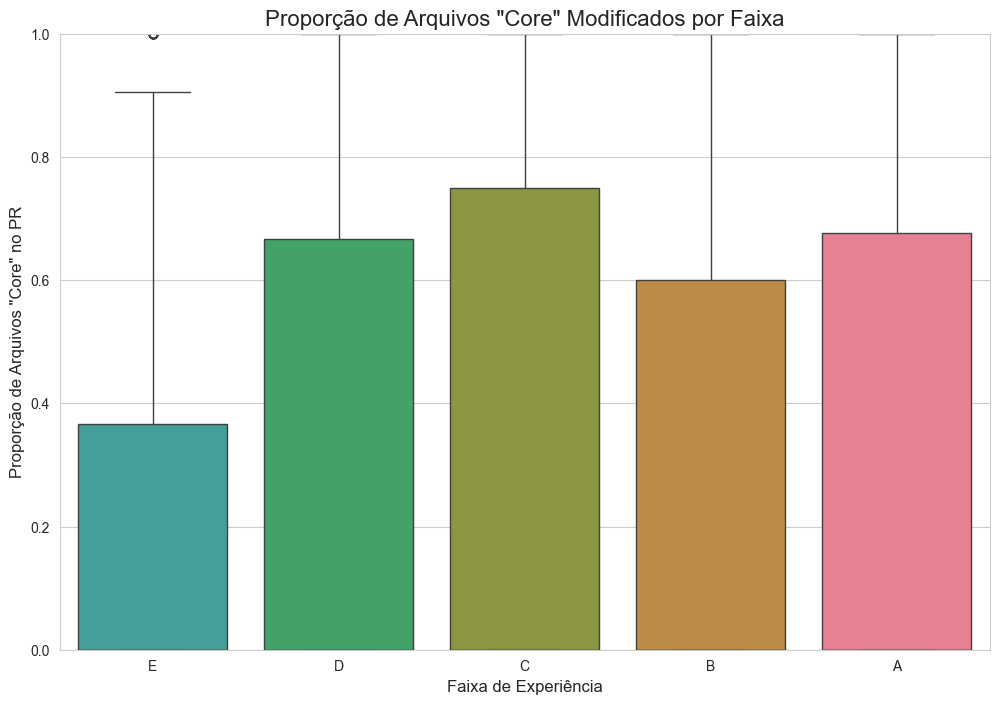

In [8]:
# Célula de Gráfico 2

plt.figure(figsize=(12, 8))
cores_husl = sns.color_palette("husl", 8)
faixas_originais = ['A', 'B', 'C', 'D', 'E']
paleta_consistente = dict(zip(faixas_originais, cores_husl))
sns.boxplot(
    x='faixa',
    y='proporcao_core',
    data=df_escopo,
    order=['E', 'D', 'C', 'B', 'A'],
    palette=paleta_consistente
)

plt.title('Proporção de Arquivos "Core" Modificados por Faixa', fontsize=16)
plt.xlabel('Faixa de Experiência', fontsize=12)
plt.ylabel('Proporção de Arquivos "Core" no PR', fontsize=12)
plt.ylim(0, 1)
plt.show()

Interações com a Timeline (Auto-Revisão):

Hipótese: Desenvolvedores experientes (Faixa A, B) são mais proativos em corrigir seus próprios PRs, adicionando commits de correção depois de abrir o PR, mas antes de receberem o primeiro feedback de um revisor.

Código de Análise

In [9]:
# Célula de Análise 3: Análise da Timeline (Self-Review)
# CÓDIGO CORRIGIDO da função de análise da timeline

from datetime import datetime, timezone

def analisar_auto_revisao(lista_de_prs):
    """
    Conta o número de commits de "auto-revisão" feitos em um PR.
    VERSÃO CORRIGIDA para lidar com eventos sem 'created_at'.
    """
    resultados = []
    for pr in lista_de_prs:
        autor = pr.get('author')
        # Pula se não houver dados essenciais
        if pr.get('faixa') == 'Desconhecida' or not pr.get('timeline') or not autor or not pr.get('created_at'):
            continue

        try:
            # Garante que as datas sejam "timezone-aware" para comparações seguras
            pr_creation_dt = datetime.fromisoformat(pr['created_at'].replace('Z', '')).replace(tzinfo=timezone.utc)
            
            # --- CORREÇÃO PRINCIPAL AQUI ---
            # Filtra a timeline para incluir apenas eventos que TÊM uma data de criação
            timeline_com_data = [evento for evento in pr.get('timeline', []) if evento.get('created_at')]

            # Encontra o timestamp da primeira revisão por OUTRA pessoa
            primeira_revisao_externa_dt = None
            # Agora, ordena a lista já filtrada, o que evita o erro
            for evento in sorted(timeline_com_data, key=lambda x: x['created_at']):
                ator_evento = evento.get('actor')
                if evento.get('event') == 'reviewed' and ator_evento and ator_evento.get('login') != autor:
                    primeira_revisao_externa_dt = datetime.fromisoformat(evento['created_at'].replace('Z', '')).replace(tzinfo=timezone.utc)
                    break
            
            # Se não houve revisão externa, o limite é o tempo "infinito" (agora)
            if primeira_revisao_externa_dt is None:
                primeira_revisao_externa_dt = datetime.now(timezone.utc)

            # Conta os commits do autor feitos entre a criação do PR e a primeira revisão externa
            self_review_commits = 0
            # Itera sobre a lista filtrada novamente
            for evento in timeline_com_data:
                ator_evento = evento.get('actor')
                if evento.get('event') == 'committed' and ator_evento and ator_evento.get('login') == autor:
                    commit_dt = datetime.fromisoformat(evento['created_at'].replace('Z', '')).replace(tzinfo=timezone.utc)
                    if pr_creation_dt < commit_dt < primeira_revisao_externa_dt:
                        self_review_commits += 1
            
            resultados.append({
                'pr_number': pr.get('pr_number'),
                'faixa': pr.get('faixa'),
                'self_review_commits': self_review_commits
            })
        except (TypeError, ValueError) as e:
            # Captura outros possíveis erros de data para não parar a execução inteira
            # print(f"Aviso: Erro ao processar datas no PR #{pr.get('pr_number')}: {e}")
            continue
        
    return pd.DataFrame(resultados)

# Execute a análise
df_timeline = analisar_auto_revisao(lista_prs_enriquecida)

# Agrupe para obter a média
media_self_review_por_faixa = df_timeline.groupby('faixa')['self_review_commits'].mean().reindex(['E', 'D', 'C', 'B', 'A'])

print("Média de Commits de Auto-Revisão por Faixa:")
display(media_self_review_por_faixa)

Média de Commits de Auto-Revisão por Faixa:


faixa
E    0.0
D    0.0
C    0.0
B    0.0
A    0.0
Name: self_review_commits, dtype: float64

Visualização

1. Carregando classificação dos desenvolvedores...
-> Mapeamento de 975 desenvolvedores carregado.

2. Calculando o número de comentários de revisão para todos os PRs...


Processando Repositórios: 100%|██████████| 13/13 [14:04<00:00, 64.98s/it]
C:\Users\macha\AppData\Local\Temp\ipykernel_13576\3215891829.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


-> Métricas de revisão calculadas para 73325 PRs.

3. Gerando gráfico da atividade de revisão...


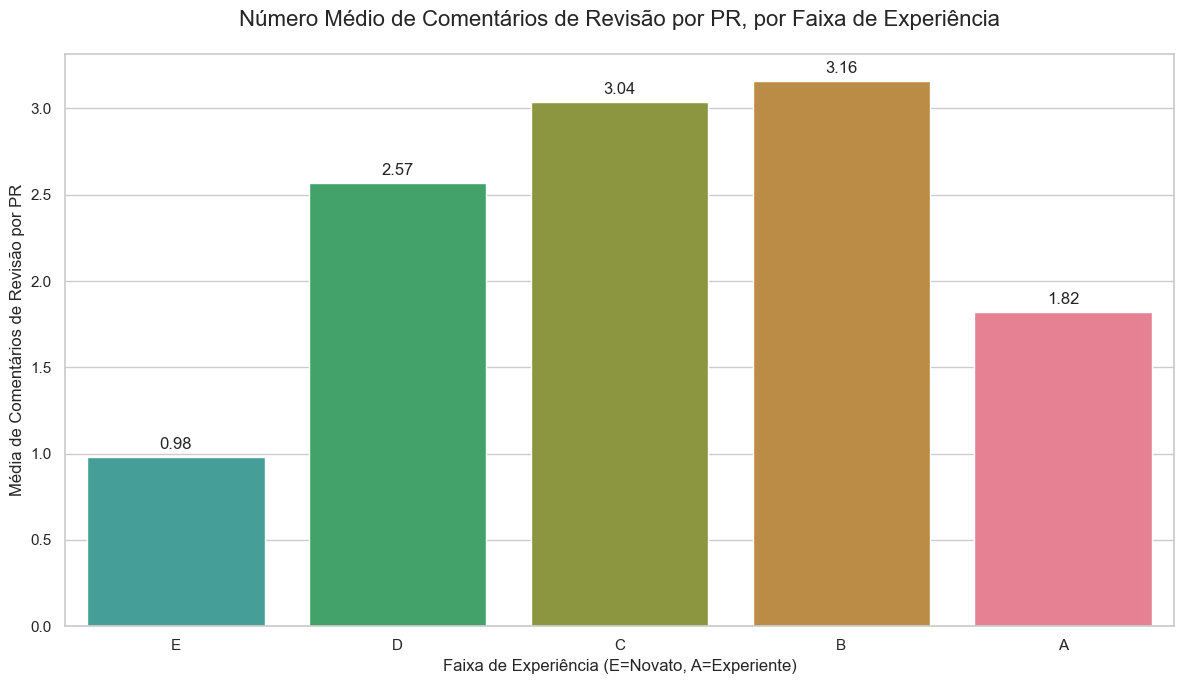

In [10]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# --- 1. Configuração Inicial ---
BASE_DIR = 'repositories-mined'
FAIXA_ORDER = ['E', 'D', 'C', 'B', 'A'] # Ordem para o eixo X do gráfico

# --- 2. Funções de Carregamento e Processamento ---
def carregar_faixas_desenvolvedores(base_path):
    """
    Carrega o mapeamento de (repositório, autor) para a sua faixa de performance.
    """
    mapa_devs = {}
    print("1. Carregando classificação dos desenvolvedores...")
    if not os.path.exists(base_path):
        print(f"ERRO: O diretório base '{base_path}' não foi encontrado. O script não pode continuar.")
        return None

    for repo_name in os.listdir(base_path):
        repo_path = os.path.join(base_path, repo_name)
        if not os.path.isdir(repo_path): continue
        devs_file = os.path.join(repo_path, 'sample-devs.jsonl')
        if os.path.exists(devs_file):
            with open(devs_file, 'r', encoding='utf-8') as f:
                for line in f:
                    try:
                        data = json.loads(line)
                        key = (data['repo'].lower().replace('/', '-'), data['author'].lower())
                        mapa_devs[key] = data['faixa']
                    except (json.JSONDecodeError, KeyError):
                        continue
    print(f"-> Mapeamento de {len(mapa_devs)} desenvolvedores carregado.")
    return mapa_devs

def calcular_metricas_de_revisao(base_path, mapa_devs):
    """
    Calcula o número total de comentários de revisão para cada PR.
    """
    dados_revisao = []
    print("\n2. Calculando o número de comentários de revisão para todos os PRs...")

    repo_list = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]
    for repo_name in tqdm(repo_list, desc="Processando Repositórios"):
        devs_path = os.path.join(base_path, repo_name, 'developer')
        if not os.path.isdir(devs_path): continue
        for dev_name in os.listdir(devs_path):
            results_path = os.path.join(devs_path, dev_name, 'results')
            if not os.path.isdir(results_path): continue
            for pr_file in os.listdir(results_path):
                if pr_file.endswith('.json'):
                    pr_path = os.path.join(results_path, pr_file)
                    try:
                        with open(pr_path, 'r', encoding='utf-8') as f:
                            pr_data = json.load(f)

                        repo_pr, autor_pr = pr_data.get('repo'), pr_data.get('author')
                        if not repo_pr or not autor_pr: continue

                        repo_normalizado = repo_pr.replace('/', '-')
                        chave_pr = (repo_normalizado.lower(), autor_pr.lower())

                        if chave_pr in mapa_devs:
                            faixa = mapa_devs[chave_pr]

                            num_review_comments = pr_data.get('counts', {}).get('review_comments', 0)

                            dados_revisao.append({
                                'faixa': faixa,
                                'num_review_comments': num_review_comments
                            })
                    except Exception:
                        continue

    print(f"-> Métricas de revisão calculadas para {len(dados_revisao)} PRs.")
    return pd.DataFrame(dados_revisao)


# --- 3. Bloco Principal de Execução ---
if __name__ == "__main__":
    mapa_desenvolvedores = carregar_faixas_desenvolvedores(BASE_DIR)

    if mapa_desenvolvedores:
        df_revisao = calcular_metricas_de_revisao(BASE_DIR, mapa_desenvolvedores)

        if not df_revisao.empty:
            print("\n3. Gerando gráfico da atividade de revisão...")

            # --- INÍCIO DA MODIFICAÇÃO: Definindo a paleta de cores ---
            cores_husl = sns.color_palette("husl", 8)
            faixas_originais = ['A', 'B', 'C', 'D', 'E']
            paleta_consistente = dict(zip(faixas_originais, cores_husl))
            # O Seaborn vai mapear as cores corretamente para cada faixa
            # --- FIM DA MODIFICAÇÃO ---

            # Calcular a média de comentários por faixa e reordenar
            media_comentarios_por_faixa = df_revisao.groupby('faixa')['num_review_comments'].mean().reindex(FAIXA_ORDER)
            df_plot = media_comentarios_por_faixa.reset_index()

            plt.figure(figsize=(12, 7))
            sns.set_theme(style="whitegrid")

            barplot = sns.barplot(
                data=df_plot,
                x='faixa',
                y='num_review_comments',
                palette=paleta_consistente,  # Aplicando a paleta
                order=FAIXA_ORDER # Garantindo a ordem de E para A
            )

            for p in barplot.patches:
                barplot.annotate(format(p.get_height(), '.2f'),
                                 (p.get_x() + p.get_width() / 2., p.get_height()),
                                 ha = 'center', va = 'center',
                                 xytext = (0, 9),
                                 textcoords = 'offset points')

            plt.title('Número Médio de Comentários de Revisão por PR, por Faixa de Experiência', fontsize=16, pad=20)
            plt.xlabel('Faixa de Experiência (E=Novato, A=Experiente)', fontsize=12)
            plt.ylabel('Média de Comentários de Revisão por PR', fontsize=12)

            plt.tight_layout()
            plt.show()
        else:
            print("Nenhum dado de revisão foi gerado. Verifique os dados de entrada.")
    else:
        print("Mapeamento de desenvolvedores falhou. O script não pode continuar.")

Discussão dos Resultados: O resultado aqui pode ser interessante. Você pode ver uma curva em "U", onde novatos (Faixa E) fazem muitas correções porque são instruídos a fazer, e experientes (Faixa A) fazem muitas porque percebem seus próprios erros. 

Ou, pode ser uma linha crescente, indicando que a auto-revisão é um hábito que se adquire com o tempo.

Como Estruturar seu Trabalho (Conclusão)
Com estas três análises, você tem material de alta qualidade para a seção "Análise de Conformidade com as Normas do Projeto" do seu estudo.

Para cada análise acima, você tem a Hipótese, o Código (sua metodologia), a Visualização (seu resultado gráfico) e a Discussão (sua interpretação).

Teste de Significância: Para dar mais peso às suas conclusões, você pode usar ANOVA para comparar as médias entre as 5 faixas para cada métrica (taxa de conformidade, proporção core, etc.). Um p-valor baixo (ex: p \< '0.05') indicaria que as diferenças observadas entre as faixas não são devidas ao acaso.

Discussão Geral: Na sua discussão final, você pode sintetizar estes resultados para construir seus "perfis de desenvolvedor", como sugerido. 

Ex: "Adicionalmente, o perfil do desenvolvedor da Faixa A inclui uma aderência quase total aos padrões de commit do projeto e uma propensão significativamente maior a modificar o código-fonte principal, em contraste com o desenvolvedor da Faixa E, cujas contribuições tendem a ser em áreas periféricas e com menor conformidade às normas."

In [11]:
import scipy.stats as stats

# 1. Certifique-se de que o DataFrame 'df_conformidade' existe.
#    Ele foi criado na análise de "Formato das Mensagens de Commit".

# 2. Separe os dados de 'taxa_conformidade' para CADA faixa
faixa_A = df_conformidade[df_conformidade['faixa'] == 'A']['taxa_conformidade']
faixa_B = df_conformidade[df_conformidade['faixa'] == 'B']['taxa_conformidade']
faixa_C = df_conformidade[df_conformidade['faixa'] == 'C']['taxa_conformidade']
faixa_D = df_conformidade[df_conformidade['faixa'] == 'D']['taxa_conformidade']
faixa_E = df_conformidade[df_conformidade['faixa'] == 'E']['taxa_conformidade']

# 3. Execute o teste ANOVA (Análise de Variância)
#    Ele nos diz se a diferença entre as médias dos grupos é estatisticamente significativa
f_valor, p_valor = stats.f_oneway(faixa_A, faixa_B, faixa_C, faixa_D, faixa_E)

print(f"Resultado do Teste ANOVA para a Conformidade de Commits:")
print(f"Valor-P (p-value): {p_valor}")

# 4. Interprete o resultado
if p_valor < 0.05:
    print("\nConclusão: A diferença entre as médias das faixas é estatisticamente significativa.")
else:
    print("\nConclusão: Não há evidência de uma diferença estatisticamente significativa entre as médias das faixas.")

Resultado do Teste ANOVA para a Conformidade de Commits:
Valor-P (p-value): 5.678866077753075e-09

Conclusão: A diferença entre as médias das faixas é estatisticamente significativa.
